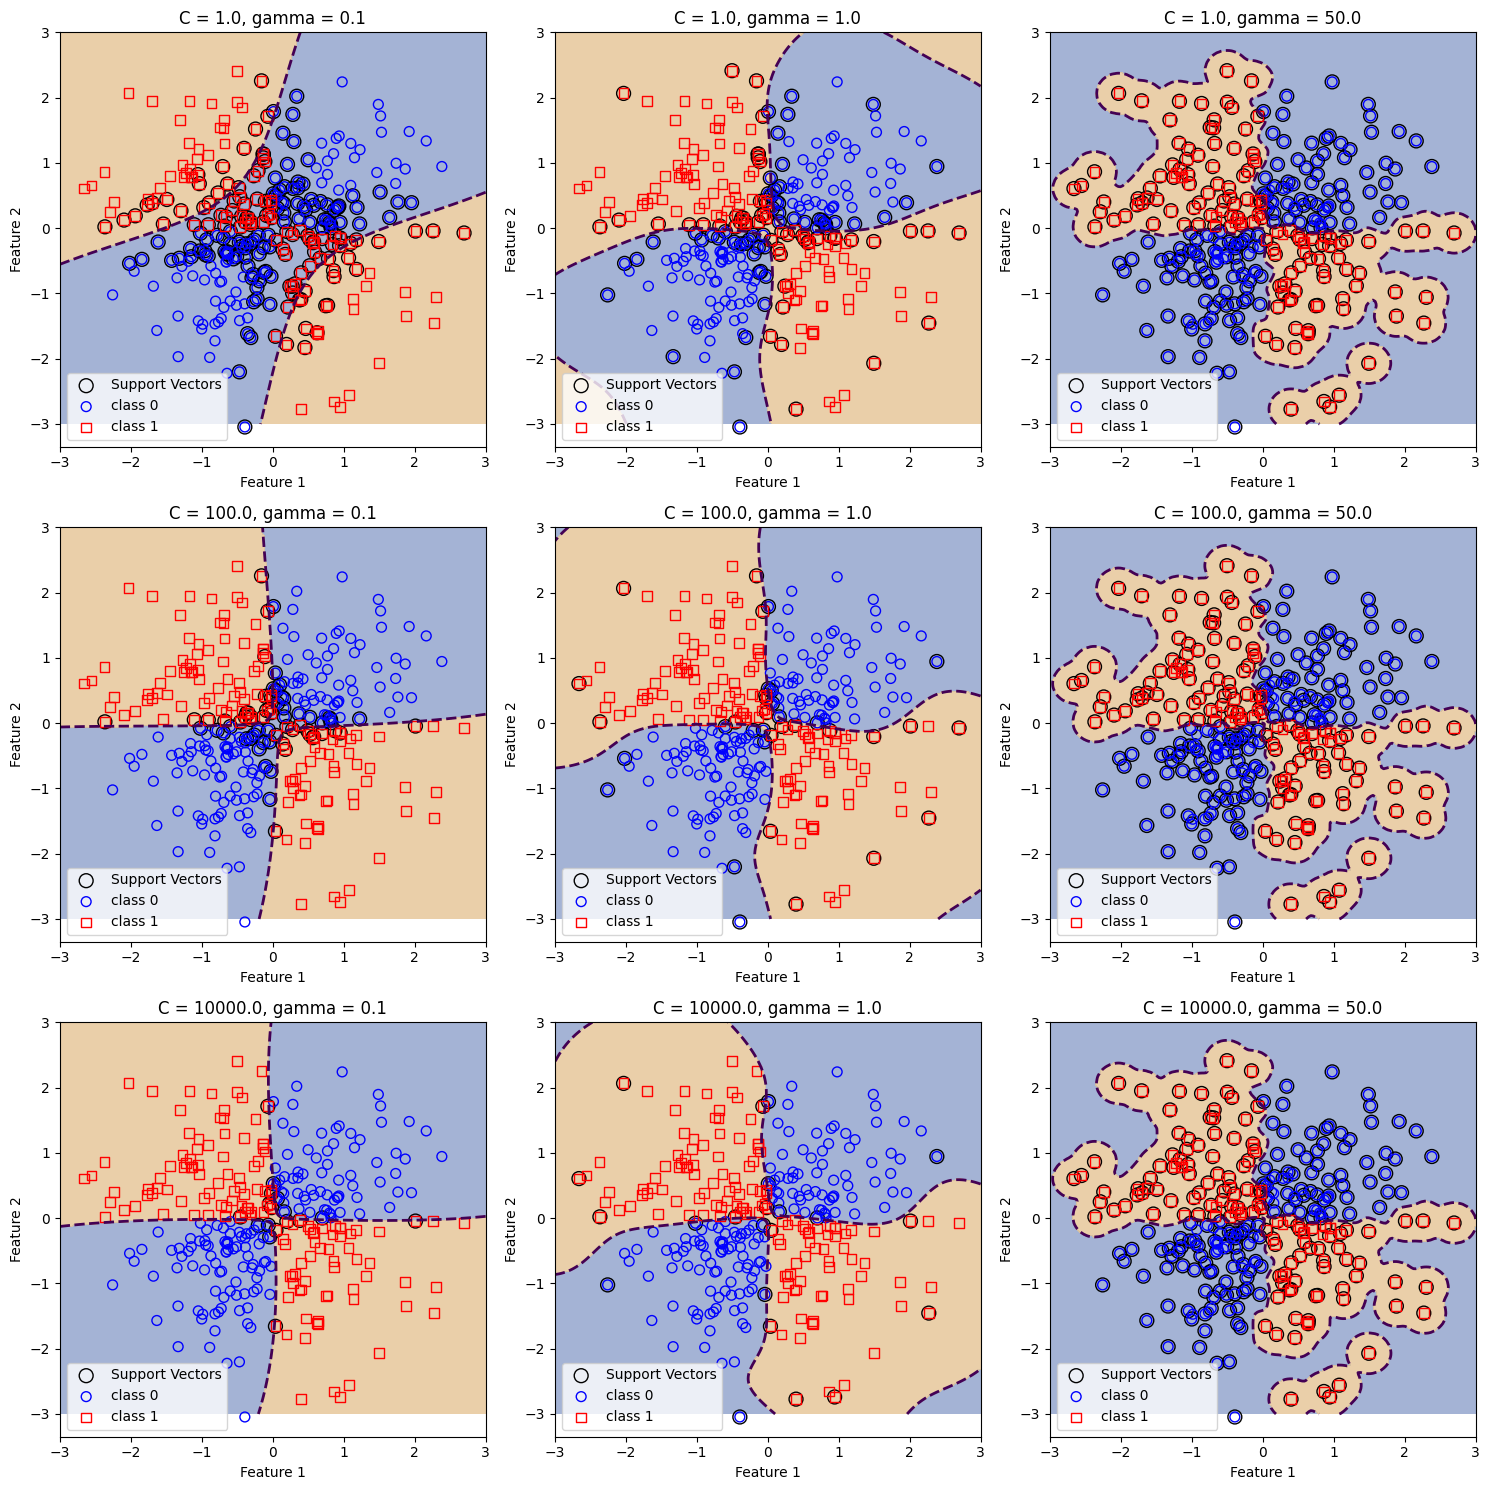

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i, C in enumerate([1, 100, 10000]):
    for j, gamma in enumerate([0.1, 1, 50]):
        # fit the model
        clf = svm.SVC(kernel="rbf", gamma=gamma, C=C)
        clf.fit(X, Y)

        # classification
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax[i,j].contourf(xx, yy, Z, cmap=plt.cm.Set2, alpha=0.8)

        # decision boundary
        ZZ = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        ZZ = ZZ.reshape(xx.shape)
        ax[i,j].contour(xx, yy, ZZ, levels=[0], linewidths=2, linestyles="dashed")

        # add support vectors
        ax[i,j].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors="none", edgecolors="k", label="Support Vectors")

        # and data
        for class_value, color, marker in zip(np.unique(Y), ["b", "r"], ["o", "s"]):
            ax[i,j].scatter(X[Y==class_value, 0], X[Y==class_value, 1], s=50, edgecolor=color, facecolor="none", marker=marker, label=f"class {int(class_value)}")

        ax[i,j].set_title(f"C = {C:.1f}, gamma = {gamma:.1f}")
        ax[i,j].set_xlabel("Feature 1")
        ax[i,j].set_ylabel("Feature 2")
        ax[i,j].legend(loc="best")

fig.tight_layout()
plt.show()